In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

import FV3log

In [2]:
# global variables for convenience
maindir = "/Users/zhuangjw/Research/Computing/FV3/outputlog/"

var_list = ['plume0{0}'.format(i) for i in range(1,5)]

Vres_list = [20,40,80,160]
Hres_list = [48,96,192,384]

Vlabels = ['L{0}'.format(r) for r in Vres_list]
Hlabels = ['C{0}'.format(r) for r in Hres_list]

In [3]:
var_list

['plume01', 'plume02', 'plume03', 'plume04']

In [4]:
size_list = ['(1000km, 0.6km)', '(1000km, 1.2km)', 
             '(500km, 0.6km)', '(500km, 1.2km)']

In [5]:
# Extract all results!
ds = FV3log.extract_HsVs(maindir, var_list, Hres_list, Vres_list)
ds


 open: C48L20_std.log C48L40_std.log C48L80_std.log C48L160_std.log 
 open: C96L20_std.log C96L40_std.log C96L80_std.log C96L160_std.log 
 open: C192L20_std.log C192L40_std.log C192L80_std.log C192L160_std.log 
 open: C384L20_std.log C384L40_std.log C384L80_std.log C384L160_std.log 

<xarray.Dataset>
Dimensions:  (Hres: 4, Vres: 4, time: 9)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8
  * Vres     (Vres) int64 20 40 80 160
  * Hres     (Hres) int64 48 96 192 384
Data variables:
    plume01  (Hres, Vres, time) float32 1.0 0.884535 0.541212 0.319658 ...
    plume02  (Hres, Vres, time) float32 1.0 0.953083 0.627592 0.48241 ...
    plume03  (Hres, Vres, time) float32 1.0 0.66268 0.372343 0.251123 ...
    plume04  (Hres, Vres, time) float32 1.0 0.774934 0.533533 0.388228 ...

In [6]:
ds_end = ds.isel(time=-1)
ds_end

<xarray.Dataset>
Dimensions:  (Hres: 4, Vres: 4)
Coordinates:
    time     int64 8
  * Vres     (Vres) int64 20 40 80 160
  * Hres     (Hres) int64 48 96 192 384
Data variables:
    plume01  (Hres, Vres) float32 0.093736 0.0973273 0.113596 0.117215 ...
    plume02  (Hres, Vres) float32 0.140424 0.183006 0.191963 0.195699 ...
    plume03  (Hres, Vres) float32 0.0659106 0.0833525 0.0971324 0.101795 ...
    plume04  (Hres, Vres) float32 0.119348 0.144062 0.158039 0.1606 0.120923 ...

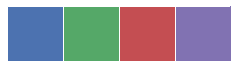

In [7]:
palette = sns.color_palette()[0:4]
sns.palplot(palette)

## trend

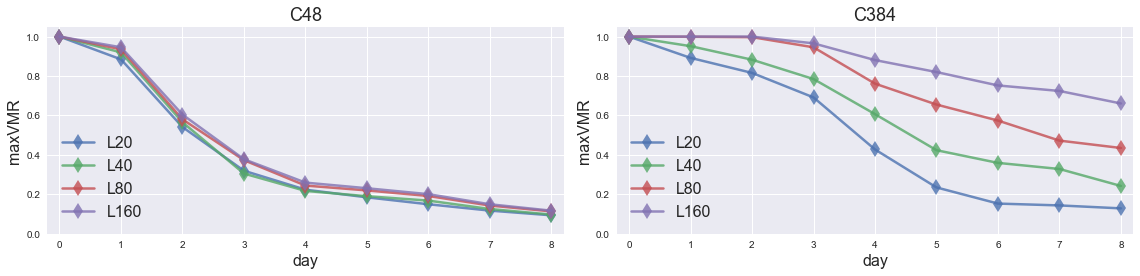

In [8]:
dr = ds['plume01'] #only look at the "standard plume"

titlesize, labelsize = [18,16]
fig, axes = plt.subplots(1,2,figsize=[16,4])

color_list = palette
marker_list = ['d','o','s','D']
alpha = 0.8
linewidth = 2.5
linestyle = '-'
markersize = 12

def set_detail(ax):
    ax.set_ylabel('maxVMR',fontsize=labelsize);ax.set_xlabel('day',fontsize=labelsize)
    ax.set_ylim([0,1.05]);ax.set_xlim([-0.2,8.2])
    ax.legend(fontsize=labelsize, loc=3)
        
for i,Hres in enumerate(Hres_list[0:4:3]):
    ax = axes[i]
    ax.set_title(label='C{0}'.format(Hres),fontsize=titlesize)
    
    for j,Vres in enumerate(Vres_list):
        marker = marker_list[0]; color = color_list[j]; 
        
        ax.plot(dr.sel(Hres=Hres,Vres=Vres),label='L{0}'.format(Vres),
                linestyle=linestyle,linewidth=linewidth,markersize=markersize,
                marker=marker,color=color,alpha=alpha)

    set_detail(ax)
        
fig.tight_layout()
fig.savefig('plume01_trend.png',dpi=200)

## last day

## plume size effect

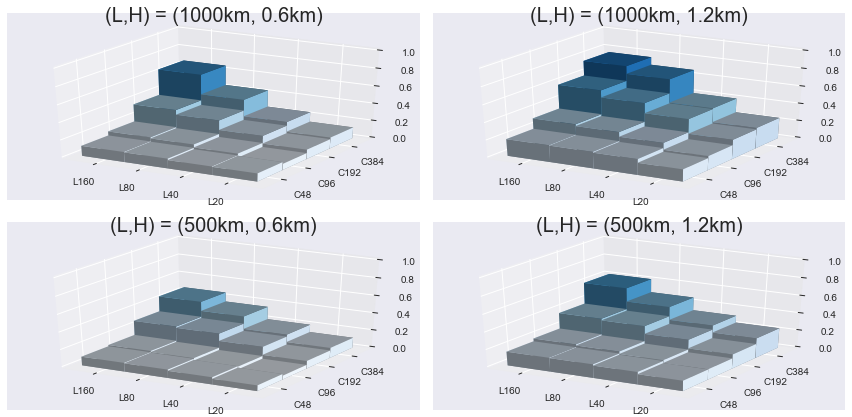

In [9]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.colors as colors

fig, axes = plt.subplots(2,2,figsize=[12,6],subplot_kw=dict(projection='3d'))

for k,var in enumerate(var_list):

    ax = axes.flatten()[k]
    testdata = ds_end[var].values
    
    # Make data.

    # fake data
    _x = np.arange(4,0,-1)
    _y = np.arange(4)
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()

    top = testdata.ravel()
    bottom = np.zeros_like(top)
    width = depth = 1

    fracs = top
    #norm = colors.Normalize(fracs.min(), fracs.max())
    norm = colors.Normalize(0, 1)
    cmap = cm.Blues(norm(fracs))
    #cmap[:,3] = 0.8 #alpha
    
    ax.bar3d(x, y, bottom, width, depth, top, color=cmap, alpha=0.2)

    ax.set_zlim([0,1])
    ax.set_title('(L,H) = '+size_list[k], fontsize=20)
    ax.set_xticks(_x+0.5); ax.set_xticklabels(Vlabels)
    ax.set_yticks(_y+0.5); ax.set_yticklabels(Hlabels)
    
plt.tight_layout()
fig.savefig('plume_size_effect.png',dpi=200)